# Read KNMI observations using hydropandas

This notebook introduces how to use the `hydropandas` package to read, process and visualise KNMI data.

## <a id=top></a>Notebook contents

1. [Observation types](#Obs)
2. [Get KNMI data](#reading)
3. [Get ObsCollections](#readingOC)
4. [Precipitation data](#precipitation)

In [1]:
from hydropandas import ObsCollection
from hydropandas.io import io_knmi
from hydropandas.observation import PrecipitationObs, EvaporationObs, MeteoObs
from IPython.display import display

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import logging

In [2]:
logging.basicConfig(level=logging.INFO)

## Observation types<a id=Obs></a>

The hydropandas package has a function to read all kinds of KNMI observations. These are stored in an `Obs` object. There are three types of observations you can obtain from the KNMI:
- `EvaporationObs`, for evaporation time series
- `PrecipitationObs`, for precipitation time series
- `MeteoObs`, for all the other meteorological time series

With the code below we get the Evaporation in [m/day] for KNMI station 344 (Rotterdam Airport).

,EV24
2020-01-01 01:00:00,0.0004
2020-01-02 01:00:00,0.0001
2020-01-03 01:00:00,0.0001
2020-01-04 01:00:00,0.0001
2020-01-05 01:00:00,0.0003


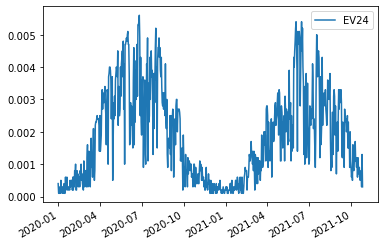

In [3]:
o = EvaporationObs.from_knmi(344)
display(o.head())
o.plot();

,RH
2020-01-01 01:00:00,0.0000
2020-01-02 01:00:00,0.0000
2020-01-03 01:00:00,0.0000
2020-01-04 01:00:00,0.0027
2020-01-05 01:00:00,0.0001


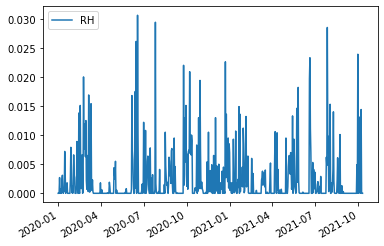

In [4]:
o = PrecipitationObs.from_knmi(344)
display(o.head())
o.plot();

**attributes**

A `MeteoObs` object has the following attributes:

* `name`: station name and variable
* `x`: x-coördinate in m RD
* `y`: y-coördinate in m RD
* `station`: station number
* `meta`: dictionary with other metadata

In [5]:
print(f"name: {o.name}")
print(f"x,y: {(o.x, o.y)}")
print(f"station: {o.station}")
print("metadata:")
for key, item in o.meta.items():
    print(f'    {key}: {item}')

name: RH_ROTTERDAM
x,y: (90598.0, 442813.0)
station: 344
metadata:
    RH: Etmaalsom van de neerslag (in m) (0 voor <0.05mm) / Daily precipitation amount (in m) (0 for <0.05mm)
    x: 90598.0
    y: 442813.0
    station: 344
    name: RH_ROTTERDAM
    variable: RH


## Get KNMI data<a id=reading></a>

There are 2 main method to obtain meteorological data:

1. `from_knmi`
2. `from_nearest_xy`

Below you can see how they can be called to obtain the precipitation data. Notice that they return the same data because station 344 is nearest to the given xy coördinates.

In [6]:
o1 = PrecipitationObs.from_knmi(344)
o2 = PrecipitationObs.from_nearest_xy(90600, 442800)
o1.equals(o2)

False

**read options**

The `MeteoObs.from_knmi` method contains the following keyword arguments:

- `stn`: station number.
- `startdate`: the start date of the time series you want, default is 1st of January 2019.
- `enddate`: the end date of the time series you want, default is today.
- `fill_missing_obs`: option to fill missing values with values from the nearest KNMI station. If measurements are filled an extra column is added to the time series in which the station number is shown that was used to fill a particular missing value.
- `interval`: time interval of the time series, default is 'daily'
- `raise_exception`: option to raise an error when the requested time series is empty.
***

The 3 examples below give a brief summary of these options

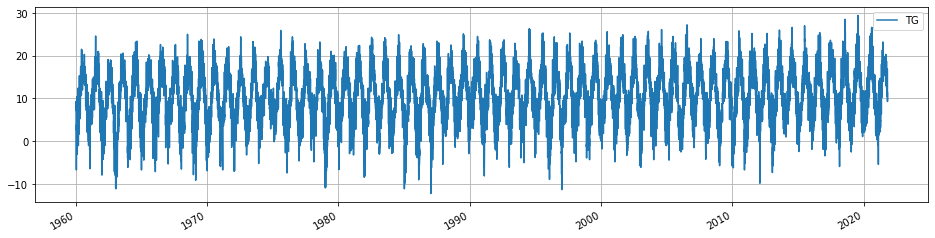

In [7]:
#example 1 get daily average temperature from 1900 till now
o_t = MeteoObs.from_knmi(344, 'TG', startdate='1960')
o_t.plot(figsize=(16,4), grid=True);

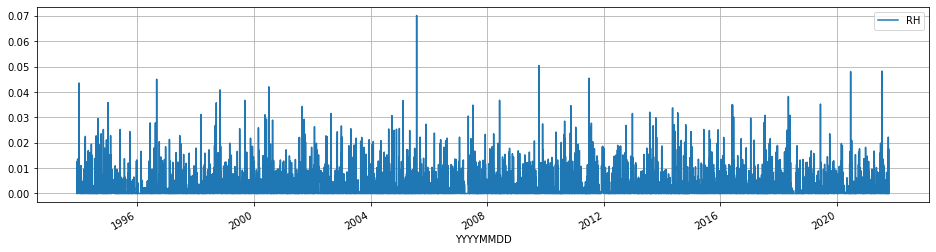

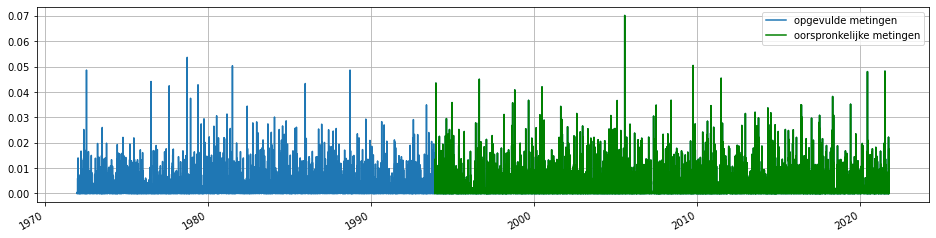

In [8]:
#example 2 get daily average precipitation from 1972 with and without filling missing measurements
o_rd = PrecipitationObs.from_knmi('892_neerslag_station', startdate='1972', fill_missing_obs=False)
o_rd.plot(figsize=(16,4), grid=True)

o_rd_filled = PrecipitationObs.from_knmi('892_neerslag_station', startdate='1972', fill_missing_obs=True)
fig, ax = plt.subplots()
o_rd_filled['RH'].plot(figsize=(16,4), ax=ax, label='opgevulde metingen');
o_rd_filled.loc[o_rd_filled['station_opvulwaarde'].isna(),'RH'].plot(color='green',ax=ax,grid=True,  label='oorspronkelijke metingen');
ax.legend()

In [9]:
#see the station_opvulwaarde
display(o_rd.head())
display(o_rd_filled.head())

,RH
YYYYMMDD,
1993-12-07 09:00:00,0.0000
1993-12-08 09:00:00,0.0126
1993-12-09 09:00:00,0.0117
1993-12-10 09:00:00,0.0000
1993-12-11 09:00:00,0.0023


,RH,station_opvulwaarde
1972-01-01 09:00:00,0.0000,910_neerslag_station
1972-01-02 09:00:00,0.0000,910_neerslag_station
1972-01-03 09:00:00,0.0000,910_neerslag_station
1972-01-04 09:00:00,0.0000,910_neerslag_station
1972-01-05 09:00:00,0.0004,910_neerslag_station


In [10]:
# example 3 get evaporation and print additional information during download using the logging module
logging.getLogger().getEffectiveLevel()
logging.getLogger().setLevel(logging.INFO)

o_ev = EvaporationObs.from_knmi(344, startdate='1972', fill_missing_obs=True)
o_ev

INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 344-ROTTERDAM between 1972-01-01 00:00:00 and 2021-10-25 14:38:03.867440
INFO:hydropandas.io.io_knmi:station 344 has no measurements before 1987-09-12 01:00:00
INFO:hydropandas.io.io_knmi:station 344 has 5809 missing measurements
INFO:hydropandas.io.io_knmi:trying to fill 5809 measurements with station [210]
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 210-VALKENBURG between 1972-01-01 00:00:00 and 2021-10-25 14:38:03.867440
INFO:hydropandas.io.io_knmi:trying to fill 5563 measurements with station [330]
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 330-HOEK-VAN-HOLLAND between 1972-01-01 00:00:00 and 2021-10-25 14:38:03.867440
INFO:hydropandas.io.io_knmi:trying to fill 5563 measurements with station [348]
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 348-CABAUW between 1972-01-01 00:00:00 and 2021-10-25 14:38:03.867440
INFO:hydropandas.io.io_knmi:trying to fill 549

error: Error -3 while decompressing data: invalid block type

## Get ObsCollections<a id=readingOC></a>

It is also possible to read multiple `Observation` objects at once and store them in an `ObsCollection` object. For this we use the `ObsCollection.from_knmi()` method. Below an example to obtain precipitation (RH) and evaporation (EV24) from the KNMI station of Rotterdam and De Bilt. 

In [ ]:
oc = ObsCollection.from_knmi(stns=[344, 260], meteo_vars=['RH', 'EV24'], ObsClass=[PrecipitationObs, EvaporationObs])
oc

Besides giving a list of stations it is also possible to:
- specify `locations` as a dataframe with x, y coördinates (RD_new), the function will find the nearest KNMI station for every location.
- specify `xmid` and `ymid` which are 2 arrays corresponding to a structured grid to obtain the nearest KNMI station for every cell in the grid.

In [ ]:
location = pd.DataFrame(index=['Rotterdam'], data ={'x':77500, 'y':399500})
ObsCollection.from_knmi(locations=location, 
                        meteo_vars=['RH'], ObsClass=[PrecipitationObs])

In [ ]:
ObsCollection.from_knmi(xmid=np.array([77500]), ymid=np.array([399500]), 
                        meteo_vars=['RH'], ObsClass=[PrecipitationObs])

## Precipitation<a id=precipitation></a>

The KNMI database has three different precipitation products:
1. Daily data from a meteorological station
2. Daily data from a neerslag (precipitation) station
3. Hourly data from a meteorological station

All three products can be obtained using the `from_knmi` method. Method 1 and 2 can also be accessed without the api.

In [ ]:
# daily meteo station
precip1 = PrecipitationObs.from_knmi(260, startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False)

In [ ]:
# daily neerslag station
precip2 = PrecipitationObs.from_knmi('550_neerslag_station', startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False)

In [ ]:
# hourly meteo station
precip3 = PrecipitationObs.from_knmi(260, startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False, interval='hourly')

In [ ]:
# daily meteo station without api
precip4 = PrecipitationObs.from_knmi(260, startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False, use_api=False)

In [ ]:
# daily meteo station without api
precip5 = PrecipitationObs.from_knmi('550_neerslag_station', startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False, use_api=False)

Om te laten zien wat de verschillen en overeenkomsten zijn, zijn de neerslaghoeveelheden van de verschillende stations in de figuur hieronder weergegeven.

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
ax.step(precip1.index, precip1.values, ls='--', lw=3, label=str(precip1.meta['station']) + '_dagelijks')
ax.step(precip2.index, precip2.values, ls='--', lw=3, label=str(precip2.meta['station']) + '_dagelijks')
ax.step(precip3.index, precip3.values, label=str(precip3.meta['station']) + '_uurlijks')
ax.step(precip4.index, precip4.values, marker='o', label=str(precip4.meta['station']) + '_dagelijks_geen_api')
ax.step(precip5.index, precip5.values, marker='o', label=str(precip5.meta['station']) + '_dagelijks_geen_api')
ax.legend()
ax.grid()
ax.set_ylabel('neerslag [m]')

Tot slot nog een kaart om de locaties van de meetstations weer te geven.

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
# plot locaties meetstations
ax.plot(precip1.x, precip1.y, marker='o', color='orange', label='meteostation', ls="none")
ax.plot(precip2.x, precip2.y, marker='o', color='purple', label='neerslagstation', ls='none')

# voeg gemeentegrenzen toe
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
gemeentegrenzen = gpd.read_file(geodata_url)
gemeentegrenzen.loc[gemeentegrenzen.statnaam.isin(['De Bilt', 'Utrecht'])].plot('statnaam',aspect=1, ax=ax, legend=True)
ax.legend()